In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  # Use this for feature scaling

# Load the dataset
df = pd.read_csv("DATA - 3.csv")
df.columns

Index(['participantID', 'age', 'nativeLanguage', 'gender', 'education', 'city',
       'country', 'responseID', 'section', 'cue', 'R1', 'R2', 'R3'],
      dtype='object')

In [4]:
df.head(10)

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,R2,R3
0,12,28,URU_R,Fe,4,Montevideo,Uruguay,128.0,set_2013,bar,abierto,cerveza,noche
1,12,28,URU_R,Fe,4,Montevideo,Uruguay,129.0,set_2013,tren,expreso,nocturno,bala
2,12,28,URU_R,Fe,4,Montevideo,Uruguay,130.0,set_2013,mano,libre,derecha,hermano
3,12,28,URU_R,Fe,4,Montevideo,Uruguay,131.0,set_2013,sopa,fría,Mafalda,verde
4,12,28,URU_R,Fe,4,Montevideo,Uruguay,132.0,set_2013,especie,ave,Darwin,extinción
5,12,28,URU_R,Fe,4,Montevideo,Uruguay,133.0,set_2013,mina,linda,minero,carbón
6,12,28,URU_R,Fe,4,Montevideo,Uruguay,134.0,set_2013,asco,puaj,Freud,feo
7,12,28,URU_R,Fe,4,Montevideo,Uruguay,135.0,set_2013,gana,pierde,partido,festeja
8,12,28,URU_R,Fe,4,Montevideo,Uruguay,136.0,set_2013,venta,compra,garage,mercado
9,12,28,URU_R,Fe,4,Montevideo,Uruguay,137.0,set_2013,iglesia,fuego,cruz,cura


In [5]:
#Handling Missing Data
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute missing values (replace NaN values with the mean for numerical columns)
imputer = SimpleImputer(strategy="mean")
numerical_cols = df.select_dtypes(include="number").columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


Missing Values:
 participantID         0
age                   0
nativeLanguage     9161
gender                0
education             0
city              62846
country            2431
responseID            1
section               1
cue                   1
R1                   44
R2                   52
R3                   68
dtype: int64


In [6]:
# Encoding Categorical Variables
# Use label encoding for ordinal categorical variables
label_encoder = LabelEncoder()
ordinal_cols = ['education']  # Add all ordinal categorical columns
for col in ordinal_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Use one-hot encoding for nominal categorical variables
nominal_cols = ['nativeLanguage', 'gender', 'city', 'country']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Scaling Numerical Features (if necessary)
# Use this step if you have numerical features with different scales
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Now, your dataset is preprocessed and ready for model building.
# You can proceed to split the data and train your predictive model.

In [7]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df.drop(columns=['R1'])  # Replace 'R1' with the target variable you want to predict
y = df['R1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Explanation:
# - 'X' should contain your feature columns (independent variables).
# - 'y' should contain the target variable (dependent variable).
# - test_size specifies the proportion of the data to be used for testing (e.g., 0.2 for a 20% test set).
# - random_state sets a seed for random number generation, ensuring reproducibility.

# Now you have X_train, X_test, y_train, and y_test to train and evaluate your model.

In [8]:
summary_stats = df.describe()
print(summary_stats)

       participantID           age     education    responseID  \
count   2.417260e+05  2.417260e+05  2.417260e+05  2.417260e+05   
mean    1.505001e-16  2.144626e-16  5.149925e-17  1.204001e-16   
std     1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min    -1.721930e+00 -2.227994e+00 -4.154936e+00 -1.740905e+00   
25%    -8.799155e-01 -8.303096e-01 -1.169256e+00 -8.633611e-01   
50%     1.996926e-03 -2.091165e-01  3.235848e-01  3.671149e-03   
75%     8.822076e-01  6.450241e-01  3.235848e-01  8.655548e-01   
max     1.705313e+00  5.071025e+00  1.816425e+00  1.727581e+00   

       nativeLanguage_ARG_N  nativeLanguage_ARG_R  nativeLanguage_URU_R  \
count         241726.000000         241726.000000         241726.000000   
mean               0.005585              0.159838              0.783722   
std                0.074523              0.366457              0.411707   
min                0.000000              0.000000              0.000000   
25%                0.000000   

In [9]:
class_distribution = df['R1'].value_counts()
class_distribution

No conozco la palabra    6710
agua                     1264
animal                   1204
comida                   1167
amor                     1130
                         ... 
antibala                    1
incentivar                  1
Personas                    1
Plantas                     1
veta                        1
Name: R1, Length: 28641, dtype: int64

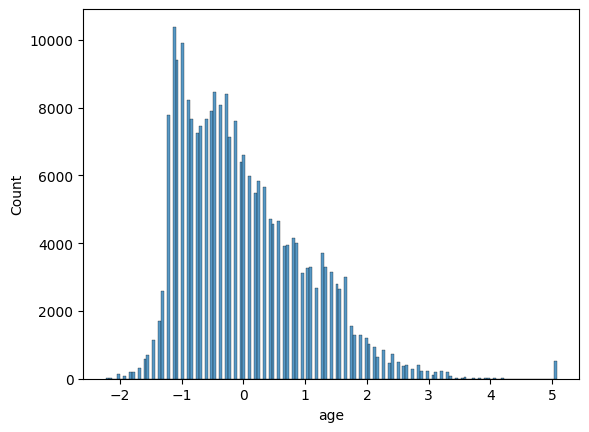

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of 'age'
sns.histplot(df['age'])
plt.show()


<ipython-input-12-c166493984c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

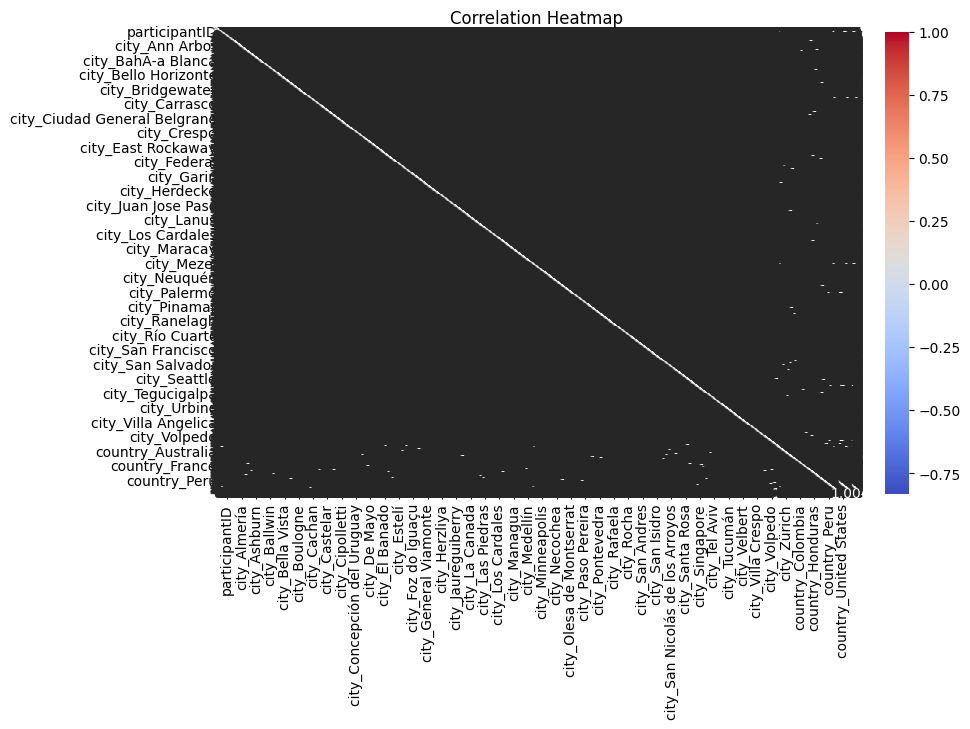

In [12]:


# 3. Heatmap for Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")


<function matplotlib.pyplot.show(close=None, block=None)>

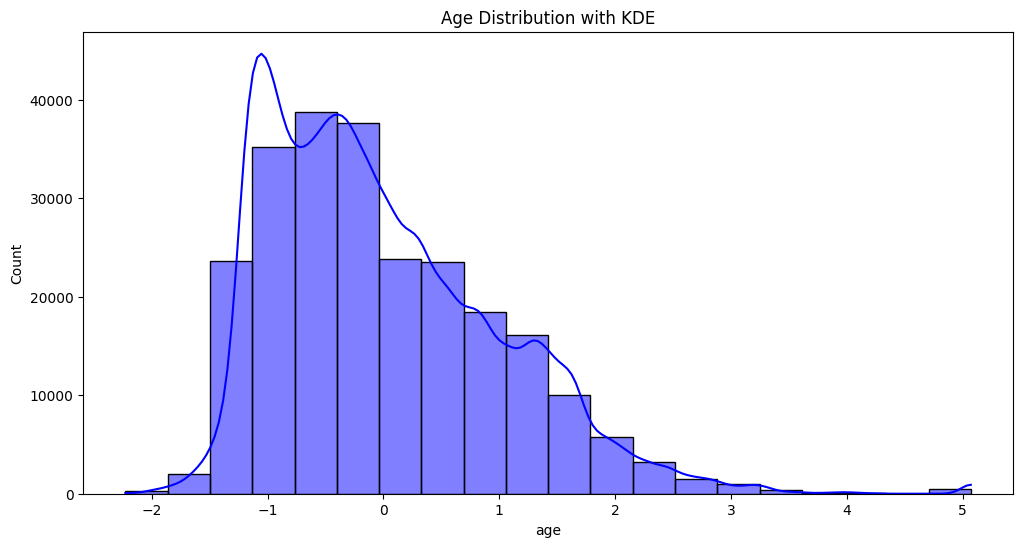

In [13]:
# 5. Distribution Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], kde=True, color='blue', bins=20)
plt.title("Age Distribution with KDE")

plt.show

In [14]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("DATA - 3.csv")

# Convert 'R1' to a numeric data type
df['R1'] = pd.to_numeric(df['R1'], errors='coerce')

# Remove NaN values from 'R1'
df = df.dropna(subset=['R1'])

# Specify categorical columns
categorical_columns = ['nativeLanguage', 'gender', 'education', 'city', 'country', 'section', 'cue']

# Label Encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Data Splitting
target_column = 'R1'  # Specify your target variable column
X = df.drop(columns=[target_column, 'R2', 'R3'])  # Features (excluding 'R2' and 'R3')
y = df[target_column]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM Regressor
regression_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, random_state=42)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Statistical Analysis (Hypothesis Testing)
X_train_with_intercept = sm.add_constant(X_train)
regressor_ols = sm.OLS(y_train, X_train_with_intercept).fit()
hypothesis_test_result = regressor_ols.summary()

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Hypothesis Testing Results:")
print(hypothesis_test_result)


<ipython-input-14-1d5e2fd61a59>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-14-1d5e2fd61a59>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-14-1d5e2fd61a59>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 10
[LightGBM] [Info] Start training from score 492132.392687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai